### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Tampilkan dataset yang akan kita pakai

In [2]:
df = pd.read_csv('../Datasets/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##### Attribute Information:
- `age` Age
- `anaemia` Decrease of red blood cells or hemoglobin (boolean)
- `creatinine_phosphokinase` Level of the CPK enzyme in the blood (mcg/L)
- `diabetes` If the patient has diabetes (boolean)
- `ejection_fraction` Percentage of blood leaving the heart at each contraction (percentage)
- `high_blood_pressure` If the patient has hypertension (boolean)
- `platelets` Platelets in the blood (kiloplatelets/mL)
- `serum_creatinine` Level of serum creatinine in the blood (mg/dL)
- `serum_sodium` Level of serum sodium in the blood (mEq/L)
- `sex` Woman or man (binary)
- `smoking` If the patient smokes or not (boolean)
- `time` Follow-up period (days)
- `DEATH_EVENT` If the patient deceased during the follow-up period (boolean)

1. Boolean features
        * Sex - Gender of patient Male = 1, Female =0
        * Diabetes - 0 = No, 1 = Yes
        * Anaemia - 0 = No, 1 = Yes
        * High_blood_pressure - 0 = No, 1 = Yes
        * Smoking - 0 = No, 1 = Yes
        * DEATH_EVENT - 0 = No, 1 = Yes

2. Other informations
        * mcg/L: micrograms per liter. mL: microliter. mEq/L: milliequivalents per litre
* The time feature seams to be highly correlated to the death event but there is no concret information of how this metric was measured patient by patient. Which makes it hard to use it in the analysis. But feel free to use it ^^ .

### EDA

#### lihat dimensi dataset dan tipe data nya

In [3]:
df.shape

(299, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#### Cek Missing Value dan Duplikat Value

In [5]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df[df.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


#### Memeriksa outliers pada dataset

In [7]:
# tampilkan statiska deskriptif
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#### tampilkan plot heatmap untuk melihat korelasi antar kolom

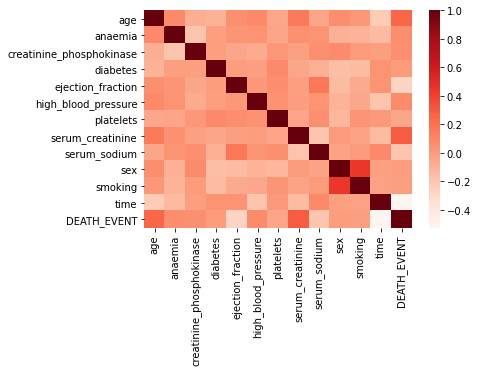

In [8]:
sns.heatmap(df.corr(), cmap='Reds');

kolom age, serum_creatinine, sex, smoking berpotensi menjadi feature untuk model

In [9]:
# melihat jumlah data/value per kolom
for i in df:
    print(f'{i}: {df[i].nunique()}')

age: 47
anaemia: 2
creatinine_phosphokinase: 208
diabetes: 2
ejection_fraction: 17
high_blood_pressure: 2
platelets: 176
serum_creatinine: 40
serum_sodium: 27
sex: 2
smoking: 2
time: 148
DEATH_EVENT: 2


In [10]:
df[(df['age'] > df['age'].min()) & (df['DEATH_EVENT']==0)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
33,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29,0
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0


In [11]:
df[(df['age'] > df['age'].min()) & (df['DEATH_EVENT']==1)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
230,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1
246,55.0,0,2017,0,25,0,314000.00,1.10,138,1,0,214,1
262,65.0,1,258,1,25,0,198000.00,1.40,129,1,0,235,1


### Visualisasi data

In [12]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


#### melihat distribusi umur

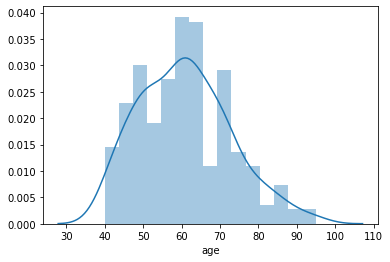

In [13]:
sns.distplot(df['age'], bins=15);

#### Plotting sex yang survive atau not survive

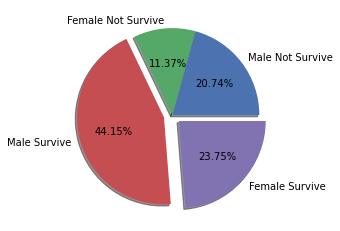

In [14]:
from matplotlib import style
style.use('seaborn-deep')

male_not_survive = len(df[(df['sex']==1) & (df['DEATH_EVENT']==1)])
female_not_survive = len(df[(df['sex']==0) & (df['DEATH_EVENT']==1)])
male_survive = len(df[(df['sex']==1) & (df['DEATH_EVENT']==0)])
female_survive = len(df[(df['sex']==0) & (df['DEATH_EVENT']==0)])

plt.pie(x=[male_not_survive,female_not_survive,male_survive,female_survive], labels=['Male Not Survive','Female Not Survive','Male Survive','Female Survive'], autopct='%0.2f%%', 
       explode=[0,0,0.1,0.1], shadow=True)
plt.show()

In [15]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

#### plotting sex yang mengalami diabetes

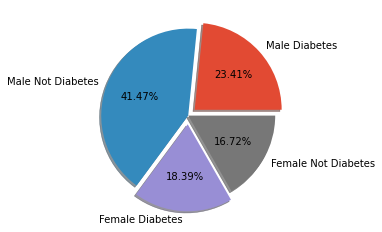

In [16]:
style.use('ggplot')
male_diab = len(df[(df['sex']==1) & (df['diabetes']==1)])
male_not_diab = len(df[(df['sex']==1) & (df['diabetes']==0)])
female_diab = len(df[(df['sex']==0) & (df['diabetes']==1)])
female_not_diab = len(df[(df['sex']==0) & (df['diabetes']==0)])
value = [male_diab, male_not_diab, female_diab, female_not_diab]

plt.pie(x=value, labels=['Male Diabetes','Male Not Diabetes','Female Diabetes','Female Not Diabetes'], autopct='%0.2f%%', explode=[0.1,0,0.1,0], shadow=True)
plt.show()

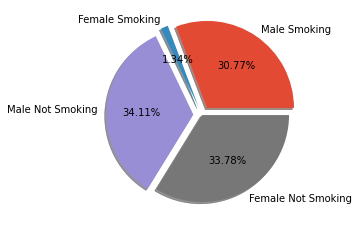

In [17]:
# jenis kelamin mana yang banyak perokok
male_smoke = len(df[(df['sex']==1) & (df['smoking']==1)])
female_smoke = len(df[(df['sex']==0) & (df['smoking']==1)])
male_not_smoke = len(df[(df['sex']==1) & (df['smoking']==0)])
female_not_smoke = len(df[(df['sex']==0) & (df['smoking']==0)])

plt.pie(x=[male_smoke, female_smoke, male_not_smoke, female_not_smoke], 
        labels=['Male Smoking','Female Smoking','Male Not Smoking','Female Not Smoking'], 
        autopct='%0.2f%%', explode=[0.1,0.1,0.1,0], shadow=True)
plt.show()

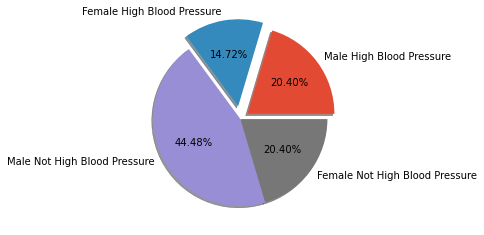

In [18]:
# sex yang paling banyak menderita high_blood_pressure
male_high = len(df[(df['sex']==1) & (df['high_blood_pressure']==1)])
female_high = len(df[(df['sex']==0) & (df['high_blood_pressure']==1)])
male_not_high = len(df[(df['sex']==1) & (df['high_blood_pressure']==0)])
female_not_high = len(df[(df['sex']==0) & (df['high_blood_pressure']==0)])

plt.pie(x=[male_high, female_high, male_not_high, female_not_high], 
        labels=['Male High Blood Pressure','Female High Blood Pressure','Male Not High Blood Pressure','Female Not High Blood Pressure'], 
        autopct='%0.2f%%', explode=[0.1,0.15,0,0], shadow=True)
plt.show()

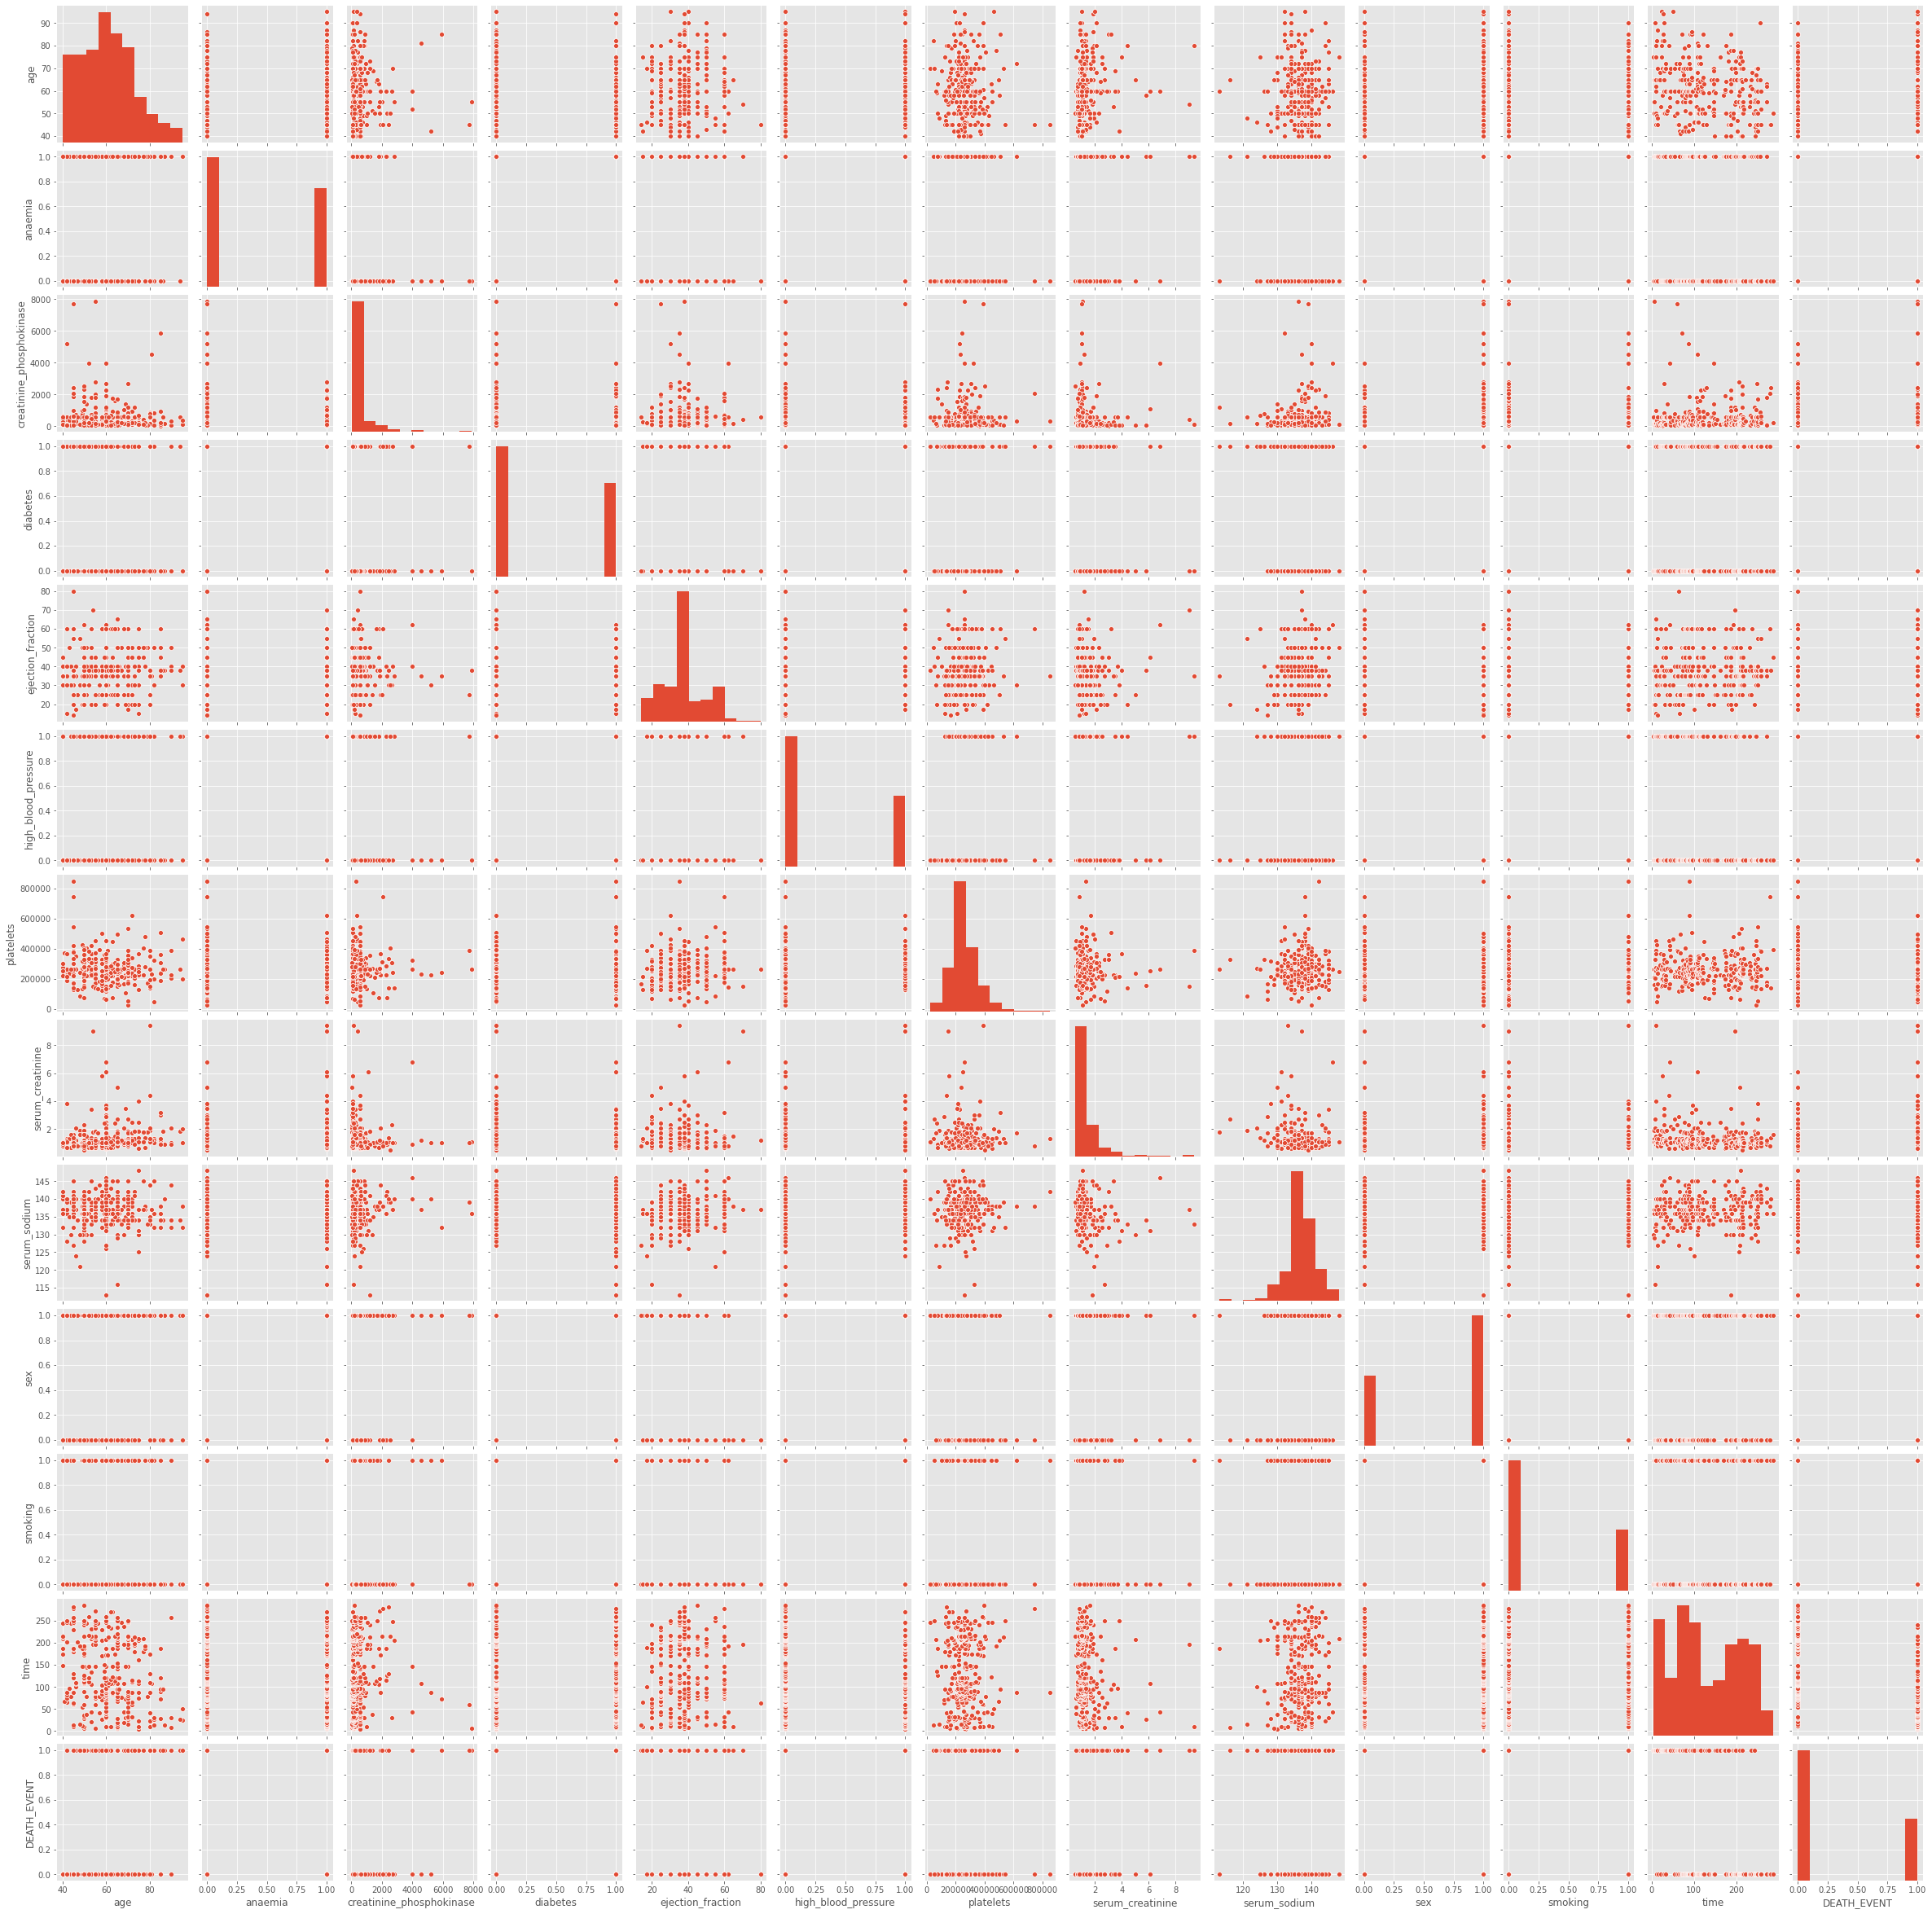

In [19]:
# pairplot
sns.pairplot(df);

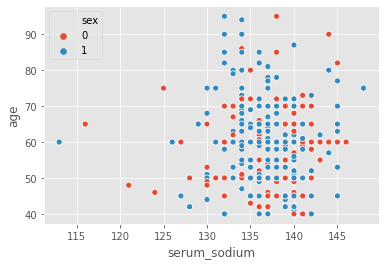

In [20]:
# ploting scatterplot umur yang memiliki serum sodium yang tinggi atau rendah dan berdasarkan sex
sns.scatterplot(x=df['serum_sodium'], y=df['age'], hue=df['sex']);

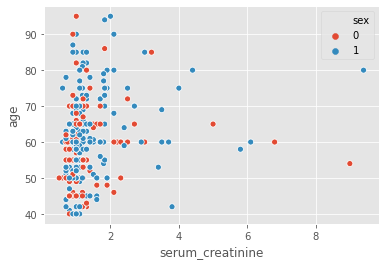

In [21]:
# ploting scatterplot umur yang memiliki serum creatinine yang tinggi atau rendah dan berdasarkan sex
sns.scatterplot(x=df['serum_creatinine'], y=df['age'], hue=df['sex']);

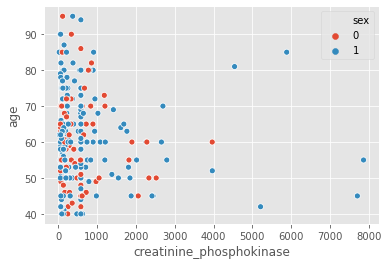

In [22]:
# ploting scatterplot umur yang memiliki creatinine_phosphokinase yang tinggi atau rendah dan berdasarkan sex
sns.scatterplot(x=df['creatinine_phosphokinase'], y=df['age'], hue=df['sex']);

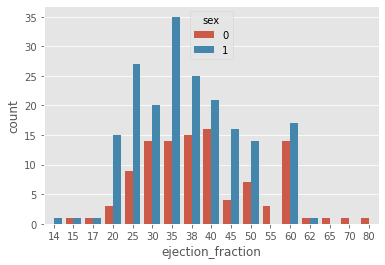

In [23]:
sns.countplot(x='ejection_fraction', hue='sex', data=df);

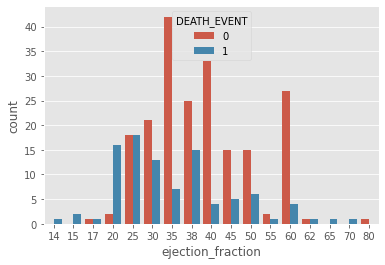

In [24]:
sns.countplot(x='ejection_fraction', hue='DEATH_EVENT', data=df);

#### membuat dataframe baru hasil dari ploting pie chart

In [25]:
new_data = {
    'male_survived' : [male_survive],
    'male_not_survived' : [male_not_survive],
    'male_diabetes' : [male_diab],
    'male_not_diabetes' : [male_not_diab],
    'male_smoking' : [male_smoke],
    'male_not_smoking' : [male_not_smoke],
    'male_high' : [male_high],
    'male_not_high' : [male_not_high],
    'female_diabetes' : [female_diab],
    'female_not_diabetes' : [female_not_diab],
    'female_survived' : [female_survive],
    'female_not_survived' : [female_not_survive],
    'female_smoking' : [female_smoke],
    'female_not_smoking' : [female_not_smoke],
    'female_high' : [female_high],
    'female_not_high' : [female_not_high]
} 

df_male_female = pd.DataFrame(new_data)
df_male_female

,male_survived,male_not_survived,male_diabetes,male_not_diabetes,male_smoking,male_not_smoking,male_high,male_not_high,female_diabetes,female_not_diabetes,female_survived,female_not_survived,female_smoking,female_not_smoking,female_high,female_not_high
0,132,62,70,124,92,102,61,133,55,50,71,34,4,101,44,61


### Feature Selection

In [26]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [27]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [28]:
X = df.drop(columns=['time','DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# feature selection
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)
scores = pd.DataFrame(fit.scores_)
col = pd.DataFrame(X.columns)
feature_score = pd.concat([col,scores], axis=1)
feature_score.columns = ['Feature','Score']
print(feature_score.nlargest(10, 'Score'))

                     Feature         Score
6                  platelets  26135.771990
2   creatinine_phosphokinase   1897.314839
4          ejection_fraction     79.072541
0                        age     44.619455
7           serum_creatinine     19.814118
8               serum_sodium      1.618175
5        high_blood_pressure      1.221539
1                    anaemia      0.746593
10                   smoking      0.032347
9                        sex      0.001956


### Model Building

In [29]:
X = df[['platelets','creatinine_phosphokinase','ejection_fraction','age','serum_creatinine']]
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [30]:
def model_build(model):
    models = model
    models.fit(X_train, y_train)
    y_pred = models.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    print('')
    print(classification_report(y_test, y_pred))
    print('')
    print(confusion_matrix(y_test, y_pred))
    print('')
    print(cross_val_score(model, X, y, cv=5).mean())

#### RandomForestClassifier

In [63]:
model_build(RandomForestClassifier(n_estimators=100, max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=10))

0.8666666666666667

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        46
           1       0.75      0.64      0.69        14

    accuracy                           0.87        60
   macro avg       0.82      0.79      0.80        60
weighted avg       0.86      0.87      0.86        60


[[43  3]
 [ 5  9]]

0.7590960451977401


#### DecisionTreeClassifier

In [61]:
model_build(DecisionTreeClassifier(max_depth=70, min_samples_leaf=8, min_samples_split=11))

0.8833333333333333

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        46
           1       0.89      0.57      0.70        14

    accuracy                           0.88        60
   macro avg       0.89      0.77      0.81        60
weighted avg       0.88      0.88      0.87        60


[[45  1]
 [ 6  8]]

0.7324858757062147


#### KNeighborsClassifier

In [33]:
model_build(KNeighborsClassifier(n_neighbors=5, leaf_size=70))

0.65

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        46
           1       0.18      0.14      0.16        14

    accuracy                           0.65        60
   macro avg       0.47      0.47      0.47        60
weighted avg       0.62      0.65      0.63        60


[[37  9]
 [12  2]]

0.6388700564971751


#### LogisticRegression

In [34]:
model_build(LogisticRegression(solver='liblinear', C=5))

0.8166666666666667

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        46
           1       0.67      0.43      0.52        14

    accuracy                           0.82        60
   macro avg       0.75      0.68      0.70        60
weighted avg       0.80      0.82      0.80        60


[[43  3]
 [ 8  6]]

0.7290395480225988


#### SVC

In [38]:
model_build(SVC(C=2.0, kernel='rbf', gamma='auto'))

0.7666666666666667

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       0.00      0.00      0.00        14

    accuracy                           0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60


[[46  0]
 [14  0]]

0.6789265536723164


In [37]:
import warnings
warnings.filterwarnings('ignore')

### Evaluasi prediksi model dengan data baru

In [65]:
prediksi_data = [
    325000.00,
    356,
    59,
    62,
    1.6
]

prediksi_data2 = [
    285000.00,
    278,
    49,
    57,
    1.9
]

models = RandomForestClassifier(n_estimators=100, max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=10)
models.fit(X_train, y_train)
pred = models.predict([prediksi_data2])
pred

array([1], dtype=int64)

### Best Parameters dengan RandomizedCV

In [52]:
model_params = {
    "RandomForestClassifier" : {
        "model" : RandomForestClassifier(),
        "params" : {
            "n_estimators" : [60,80,100],
            "bootstrap" : [True],
            "max_depth" : [60,80,100,120],
            "min_samples_leaf" : [2,3,5,7],
            "min_samples_split" : [10,12,14],
            "max_features" : [2,3,4,5]
        }
    },
    
    "KNeighborsClassifier" : {
        "model" : KNeighborsClassifier(),
        "params" : {
            "n_neighbors" : [2,3,4,5,6],
            "leaf_size" : [50,60,70,80],
            "n_jobs" : [-1,1]
        }
    },
    
    "DecisionTreeClassifier" : {
        "model" : DecisionTreeClassifier(),
        "params" : {
            "criterion" : ['gini','entropy'],
            "max_depth" : [60,70,80,90],
            "min_samples_leaf" : [7,8,9],
            "min_samples_split" : [10,11,12]
        }
    },
    
    "LogisticRegression" : {
        "model" : LogisticRegression(solver='liblinear', multi_class='auto'),
        "params" : {
            "C" : [1,5,10]
        }
    },
    
    "SVC" : {
        "model" : SVC(C=1.0, kernel='rbf', gamma='auto'),
        "params" : {
            "verbose" : [True,False],
            "max_iter" : [1,4,6,8],
            "random_state" : [10,20,30,42]
        }
    }
}

In [55]:
scores = []

for model_name, model_par in model_params.items():
    clf = RandomizedSearchCV(model_par['model'], model_par['params'], cv=5, n_iter=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

df_skor = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df_skor

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

,model,best_score,best_params
0,RandomForestClassifier,0.736170,"{'n_estimators': 80, 'min_samples_split': 14, ..."
1,KNeighborsClassifier,0.648404,"{'n_neighbors': 6, 'n_jobs': -1, 'leaf_size': 70}"
2,DecisionTreeClassifier,0.681560,"{'min_samples_split': 11, 'min_samples_leaf': ..."
3,LogisticRegression,0.694326,{'C': 1}
4,SVC,0.347340,"{'verbose': True, 'random_state': 30, 'max_ite..."
